<a href="https://colab.research.google.com/github/karagoz-matias/Data-Science-WPO/blob/main/Exercise_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FODS exercise session 4: Decision Trees, Grid-search and cross-validation, and data preprocessing for regression

## Decision Trees



Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).

However, our goal is not to obtain the purest subsets but to obtain a decision tree that generalizes well on new data. The following exercises will guide you towards the regularisation procedure that aims to obtain an optimally generalizing decision tree.

Make sure to check out the Sklearn documentation to remember the meaning of each hyperprameter: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Some of the hyperparameters:

* Criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* Splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

## Exercise 19

To understand how the Decision Tree Classifier is able to segment data, we will feed the iris dataset to the algorithm.

This dataset is about the classification of irises, characterized by 4 features (representing sepal and petal lengths/widths) into three categories of irises (Setosa, Versicolour, and Virginica). We can downlaod the iris dataset directly from the sklearn.datasets package.

In [3]:
from sklearn.datasets import load_iris

X_iris, y_iris= load_iris(return_X_y=True, as_frame=True)


Each Iris has 4 features that determine whether they belong to the Setosa, Versicolour or Virginica class.

In [4]:
X_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

The different classes are encoded as numbers (0,1,2).

In [5]:
y_iris

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

1. Import the DecisionTreeClassifier from the sklearn.tree package
2. Create an instance of the DecisionTreeClassifier and save it as the variable "first_tree".
3. Grow the tree by fitting the created DecisionTreeClassifier to the iris data (X_iris, y_iris).
4. Apply the "get_depth" (a) and "get_n_leaves" (b) methods to the grown three. What do the returned values tell you?
5. Import another function from the sklearn.tree package called "plot_tree". Pass the grown tree as an argument of this function to visualize the decision tree that segmented the iris data. Make sure to use plt.figure(figsize=(30,30)) to make the figure readable.
6. Look at the plotted decision tree and answer the following questions:  

*   Are all the leave nodes pure?
*   What is the meaning of gini? How does it change along the tree (from top to bottom?)
*   According to you, what is the most important feature for separating the
different iris classes from each other?


In [6]:
# 1

from sklearn.tree import DecisionTreeClassifier

#2
first_tree = DecisionTreeClassifier()

#3
grown_tree = first_tree.fit(X_iris,y_iris)

In [7]:
#4a
grown_tree.get_depth()
#depth is the maximum distance between the root- and the leaf node

5

In [8]:
#4b
grown_tree.get_n_leaves()
#the amount of leaves of the grown tree

np.int64(9)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

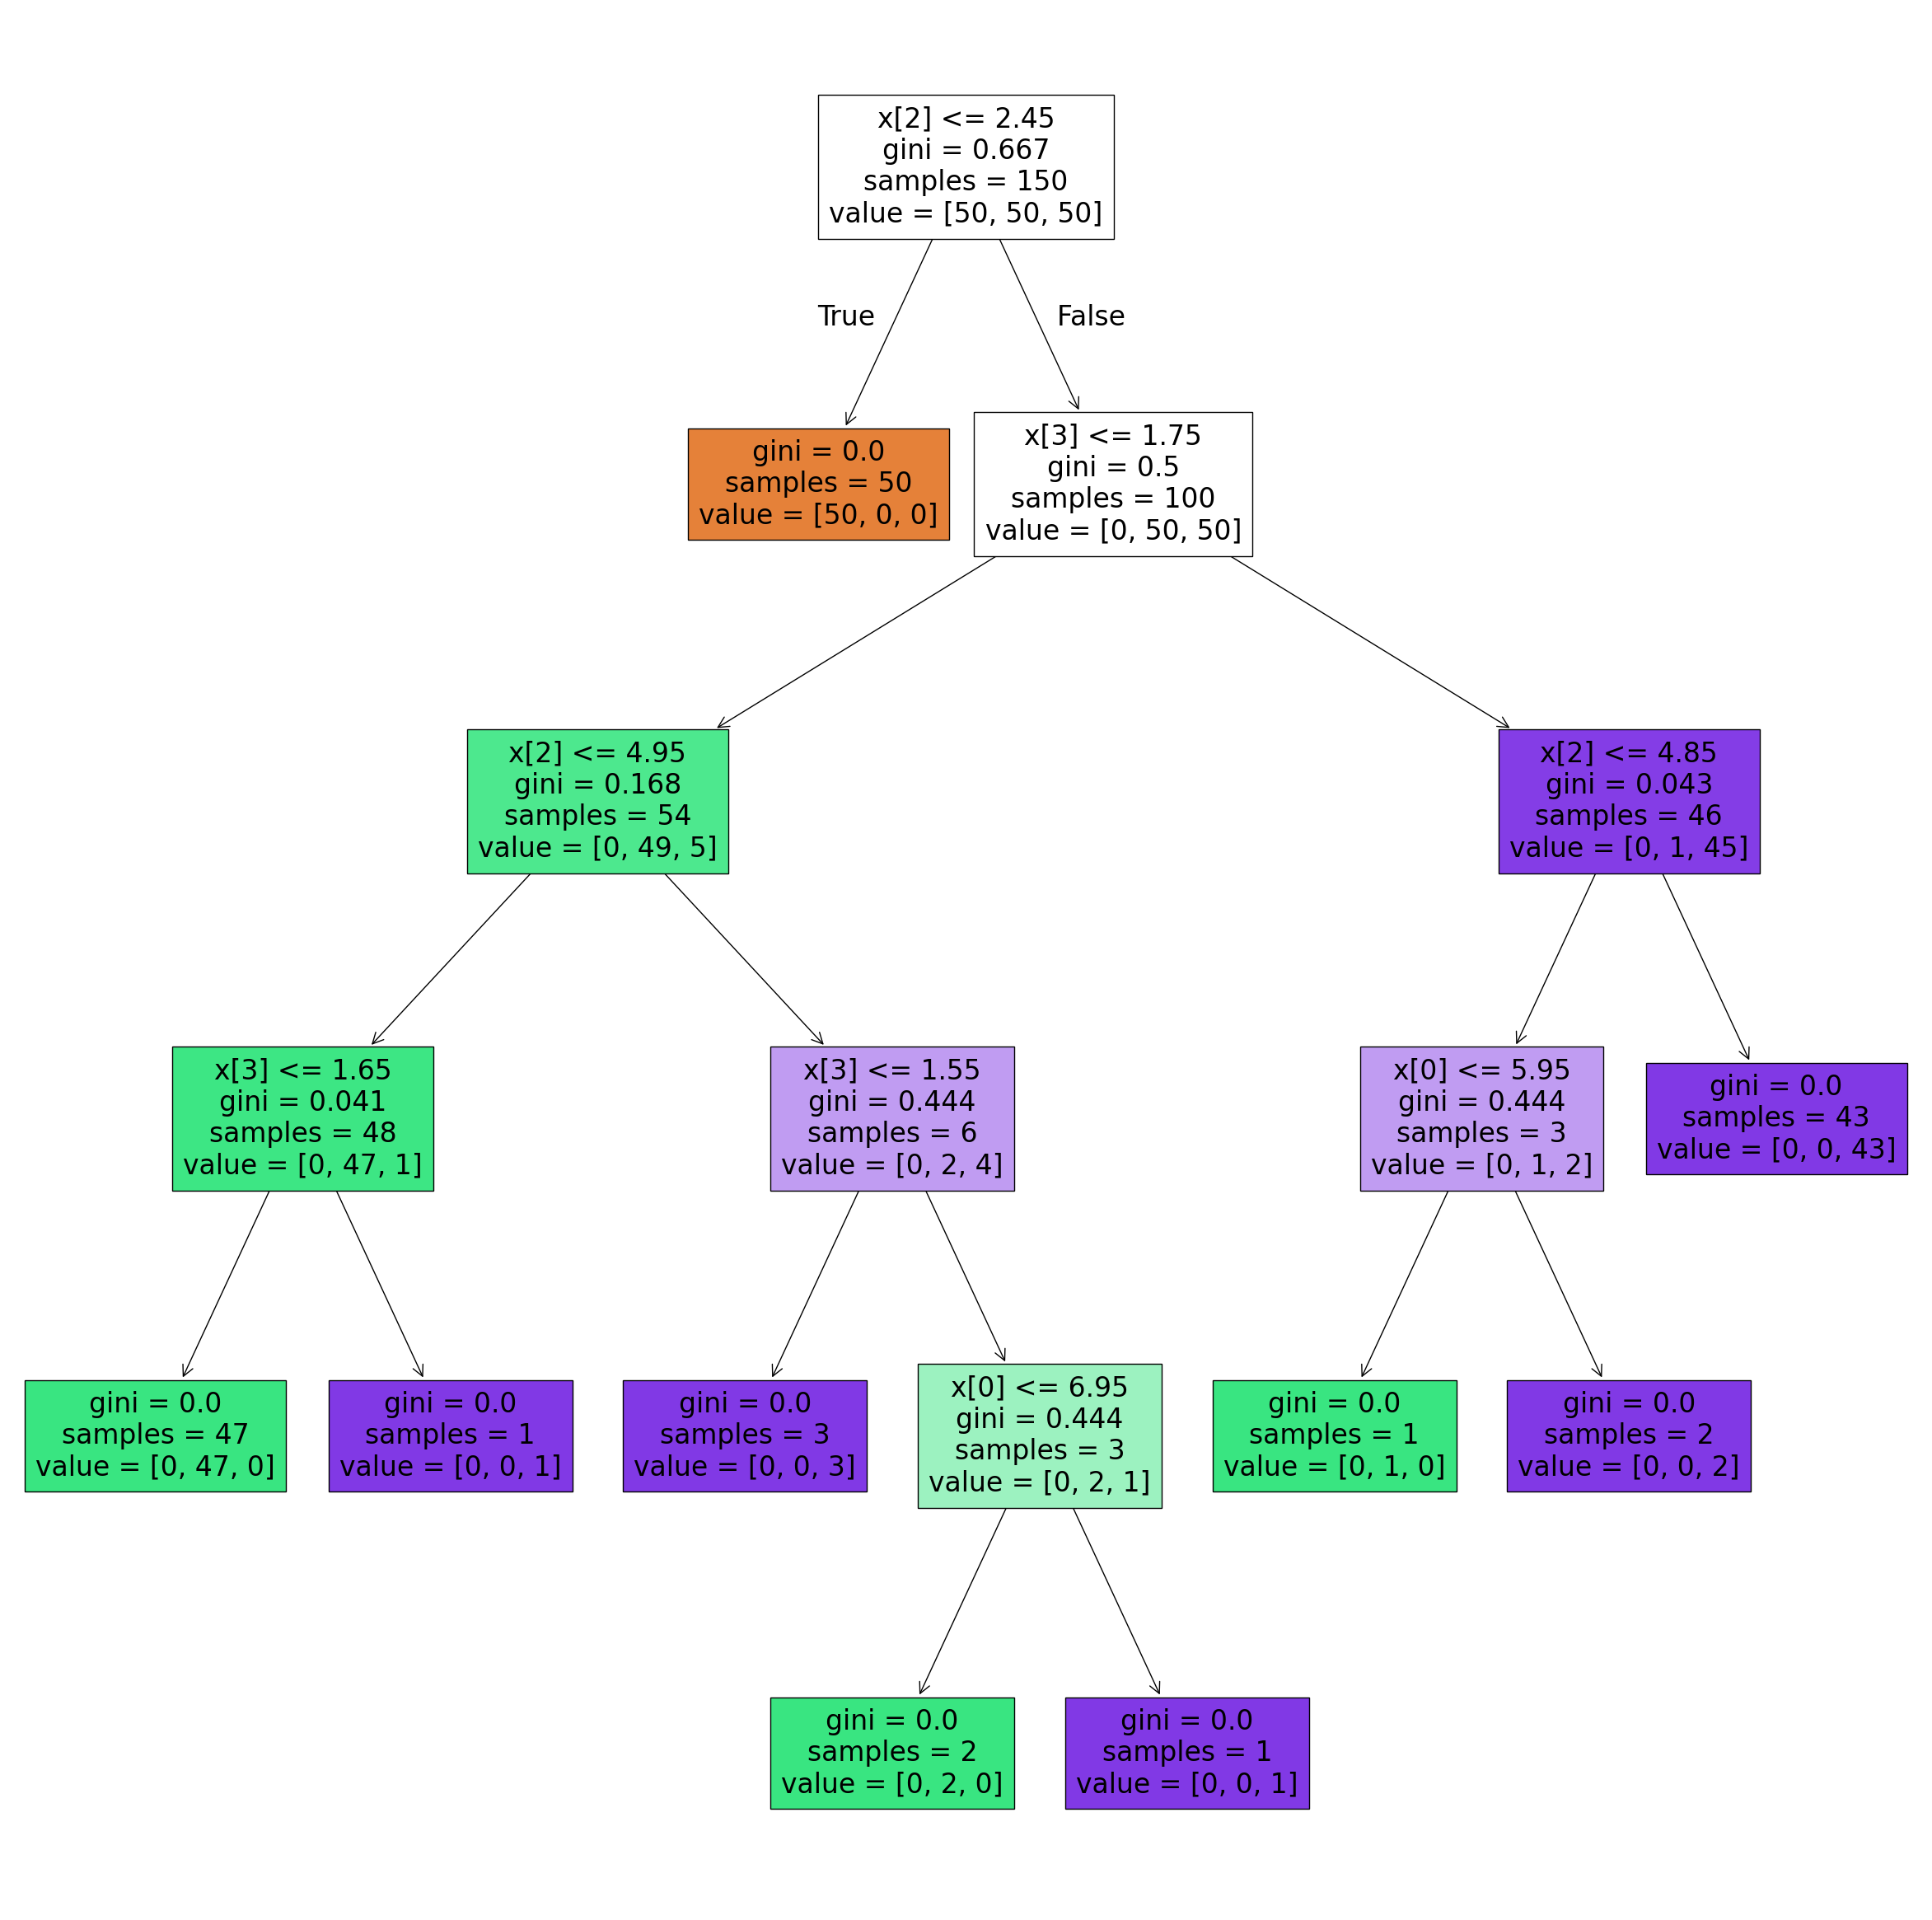

In [12]:
#5

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plot_tree(first_tree, filled = True)


6. Write your answer here:



*   Yes, because the gini coefficient is 0, furthermore we observe that only samples from one and the same class are still present
*   The gini coefficient is a measure for impurity, it's used to calculate the information gain a split could offer
*   Is petal length smaller or equal to 2.5cm



## Exercise 20

Ultimately, we want to use the decision tree to classify new examples, for which we do not have a label yet. = we want the decision tree to generalize well on unseen samples.

1) Split the iris dataset into a training and test set.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_iris, y_iris , test_size=0.2, random_state=0) #fill in the correct arguments


In [14]:
X_train

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
137                6.4               3.1                5.5               1.8
84                 5.4               3.0                4.5               1.5
27                 5.2               3.5                1.5               0.2
127                6.1               3.0                4.9               1.8
132                6.4               2.8                5.6               2.2
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[120 rows x 4 columns]

2) Use the training data to grow a new decision tree called "tree_2". Grow the tree by fitting it to the the training data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_2 = DecisionTreeClassifier()
grown_tree = tree_2.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

3) Use the grown tree to make predictions on unseen data (test data). Save the resulting predictions as the variable "pred_2". You can use the “predict” method of the grown tree to make prediction for the X_test labels.

In [23]:
pred_2 = grown_tree.predict(X_test)

4) Evaluate the performance of the tree on the test data. Use the accuracy metric from sklearn. To do so, you have to import the "accuracy_score" function from the sklearn.metrics package. What are the inputs of this function? Check the documentation! https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [26]:
from sklearn.metrics import accuracy_score
# this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
accuracy_score(y_test,pred_2)

1.0

The iris classification problem is not complex. As you can see, we easily achieved perfect accuracy. However, this will not be the case for many more complex supervised learning problems. In these cases, we will also need to tune the hyperparameters on a validation set.




---



## Exercise 21



In this exercise, we will analyze the influence of the hyperparameter values on the complexity of the decision tree. To do so, we will work with a new dataset: the red wine quality dataset.

0. Download the winequality-red.csv file and transform it to a dataframe. Save the dataframe as the variable "wine_qual".

In [27]:
import pandas

wine_qual=pandas.read_csv("/content/winequality-red.csv")

In [28]:
wine_qual.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

1. Split the dataframe into labels X_wine and targets y_wine (hint: use the drop function for X).
2. Split the X and Y data into train and test subsets. Call the resulting variables X_train_w, X_test_w,...Use a test size of 20 percent and random state equal to zero.
3. Create an instance of a DecisionTreeClassifier, call it “Tree_A.” Do not change anything about the parameters. Fit this tree to the training data. Apply the get_depth() and get_n_leaves() methods to the grown tree.
4. Repeat exercise 3 with a DecisionTreeClassifier that you call “Tree B” and where the maximum number of leaf nodes is 200. Compare the complexity of this tree to Tree A, what do you see?
5. Repeat exercise 3 with a DecisionTreeClassifier that you call “Tree_C” . Adapt the maximum depth to 12. Compare the complexity of this tree to Tree B, what do you see?
6. Use the accuracy score to compare the generalization performance of Tree A, B and C! What do you observe? Which dataset did you use?

In [29]:
# 1 Split the dataframe into labels X_wine and targets Y_wine.
#drop function is used to take everything besides of the quality variable
X_wine= wine_qual.drop(["quality"], axis=1)
y_wine= wine_qual["quality"]

In [31]:
# 2 Split the X and Y data into train and test subsets.Call the resulting variables X_train_w, X_test_w, ...Use random_state=0 and test_size of 20 percent.
# Use random_state=0

X_train_w, X_test_w, y_train_w, y_test_w=train_test_split(X_wine, y_wine , test_size=0.2, random_state=0)

20
330


[Text(0.43444570258321774, 0.9761904761904762, 'x[10] <= 10.35\ngini = 0.648\nsamples = 1279\nvalue = [8.0, 42.0, 546.0, 496.0, 172.0, 15.0]'),
 Text(0.21920509708737865, 0.9285714285714286, 'x[9] <= 0.585\ngini = 0.527\nsamples = 703\nvalue = [5.0, 23.0, 428.0, 222.0, 24.0, 1.0]'),
 Text(0.3268253998352982, 0.9523809523809523, 'True  '),
 Text(0.043494278779472956, 0.8809523809523809, 'x[10] <= 9.075\ngini = 0.42\nsamples = 331\nvalue = [3.0, 15.0, 242.0, 69.0, 2.0, 0.0]'),
 Text(0.008321775312066574, 0.8333333333333334, 'x[6] <= 71.0\ngini = 0.587\nsamples = 15\nvalue = [0, 2, 5, 8, 0, 0]'),
 Text(0.005547850208044383, 0.7857142857142857, 'x[7] <= 0.996\ngini = 0.43\nsamples = 11\nvalue = [0, 2, 1, 8, 0, 0]'),
 Text(0.0027739251040221915, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.008321775312066574, 0.7380952380952381, 'x[8] <= 3.08\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 1, 8, 0, 0]'),
 Text(0.005547850208044383, 0.6904761904761905, 'gini

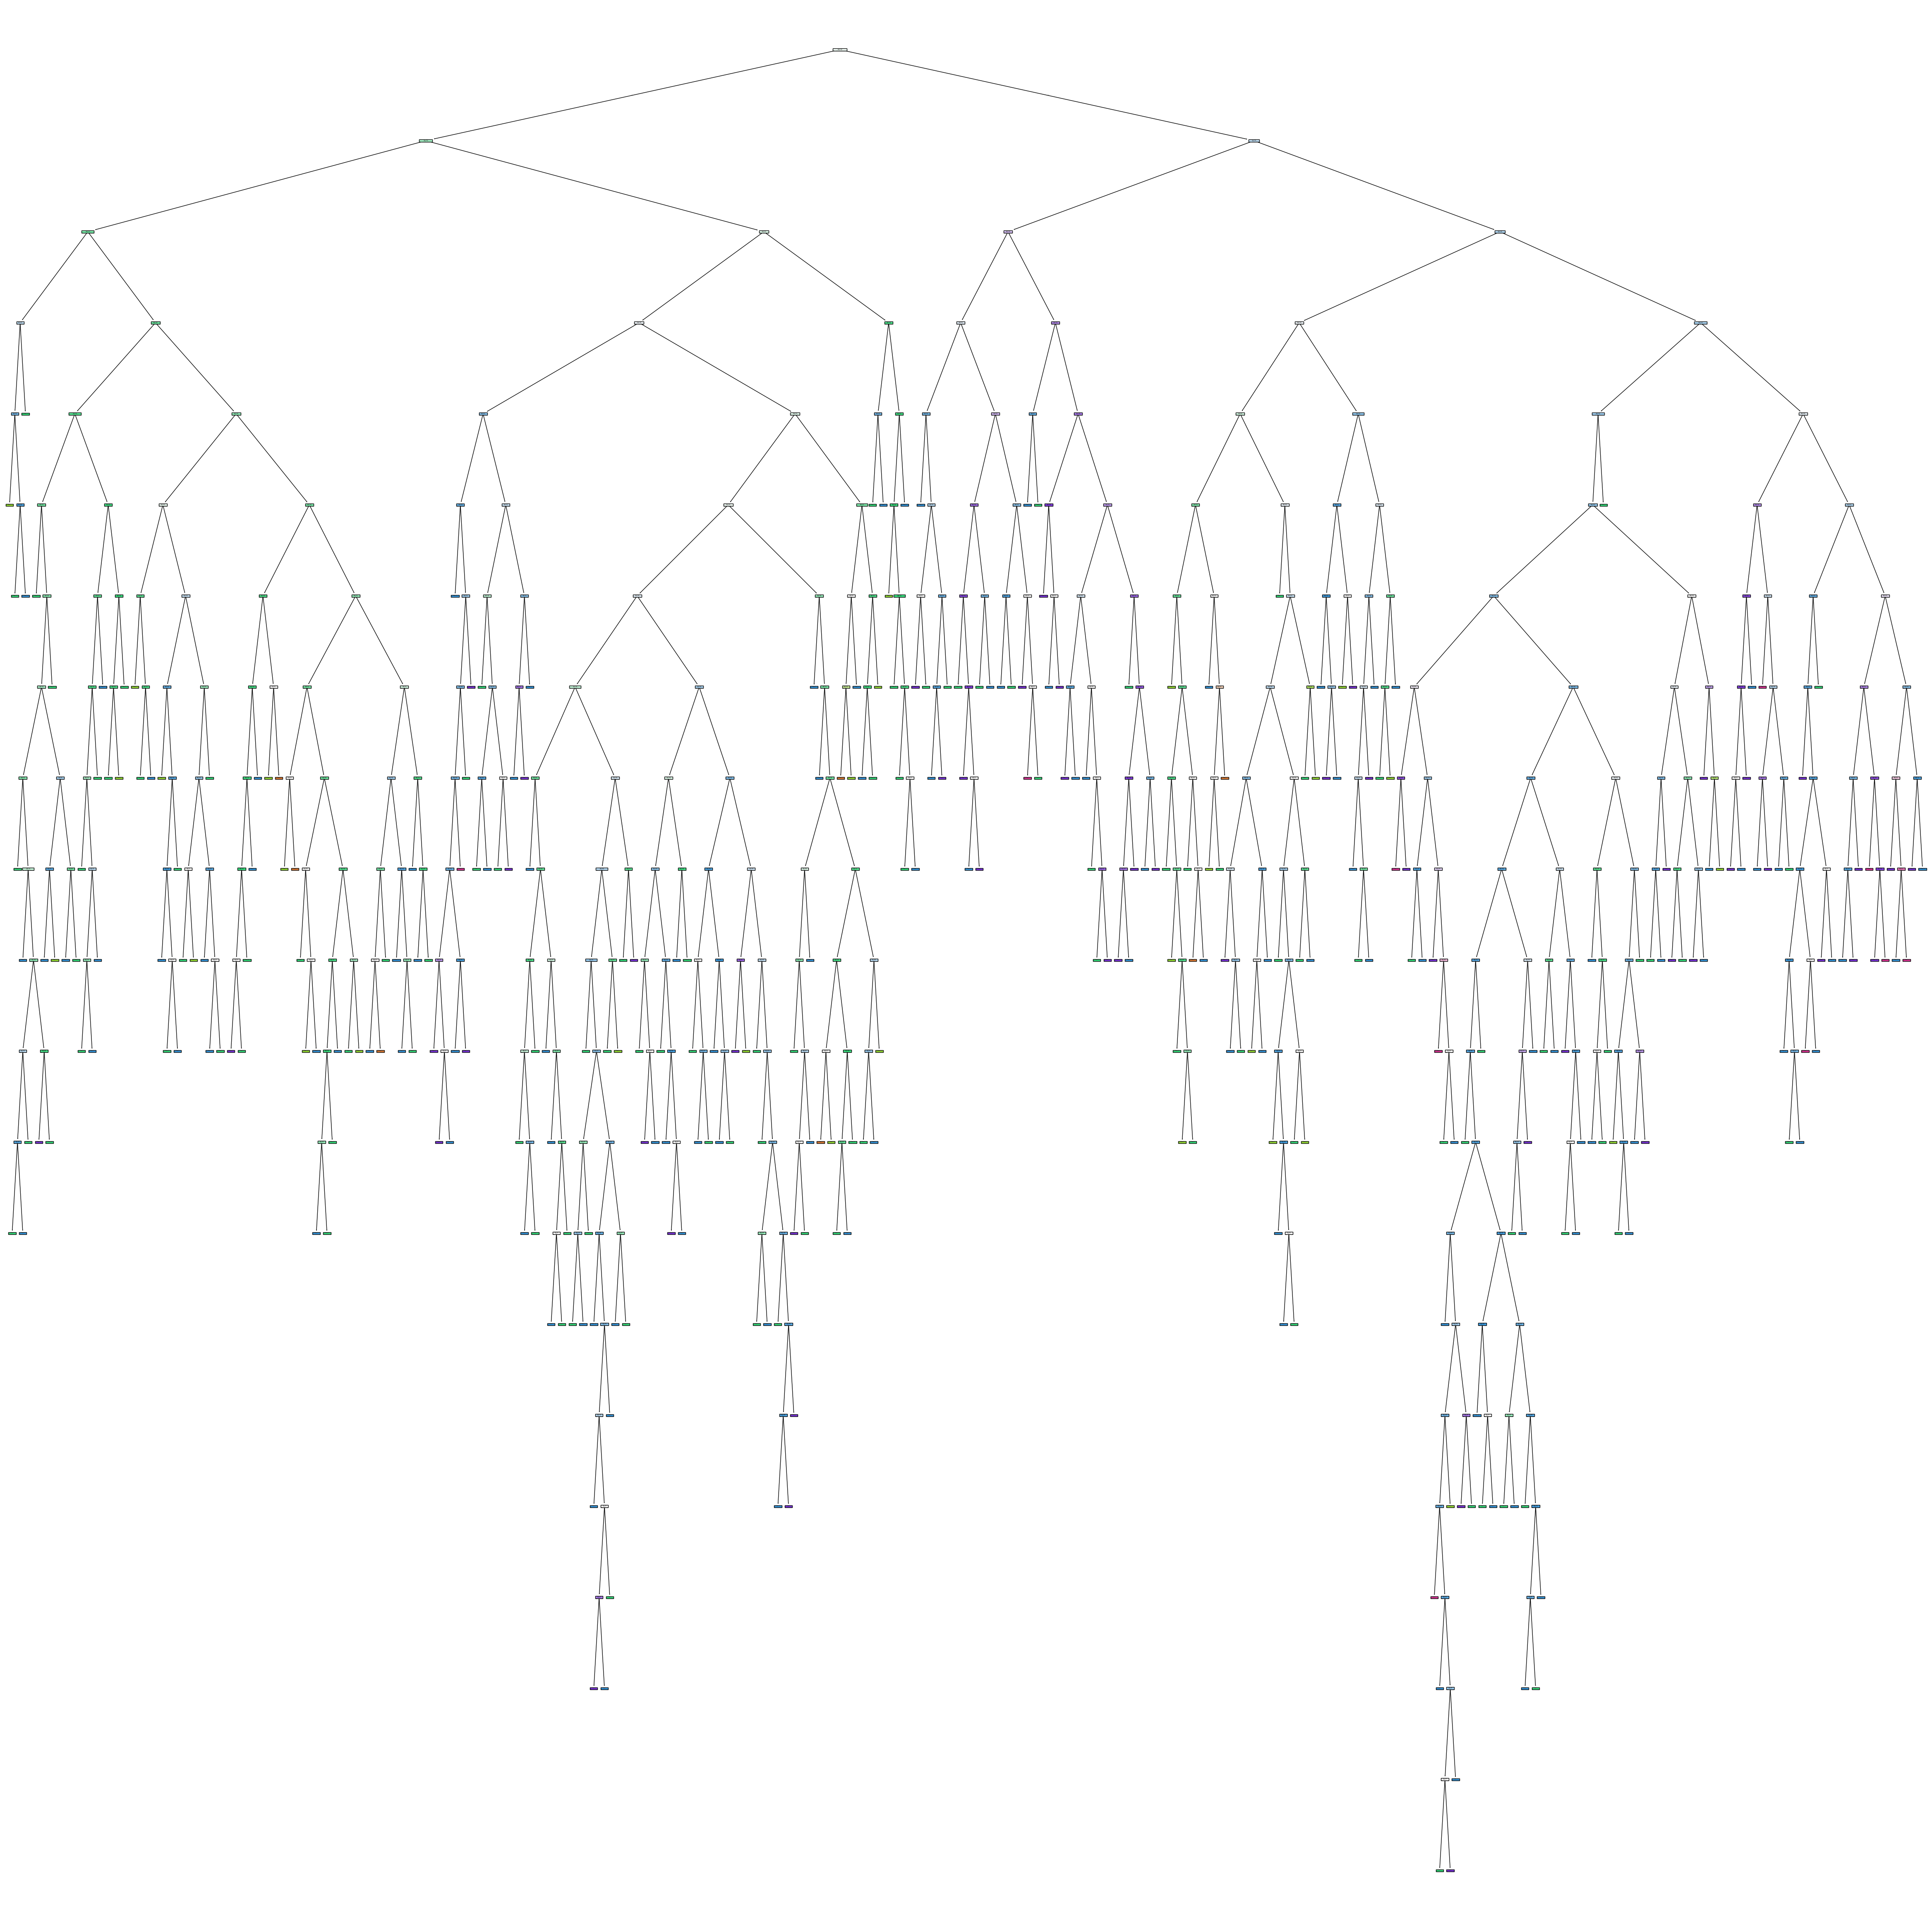

In [52]:
# 3 Create an instance of a DecisionTreeClassifier, call it “Tree_A.” Do not change anything about the parameters. Fit this tree to the training data. Apply the get_depth() and get_n_leaves() methods to the grown tree.
# Use random_state=0

from sklearn.tree import DecisionTreeClassifier
Tree_A= DecisionTreeClassifier()
grown_tree_a = Tree_A.fit(X_train_w, y_train_w)
pred_a = grown_tree_a.predict(X_test_w)
print(grown_tree_a.get_depth())
print(grown_tree_a.get_n_leaves())

plt.figure(figsize=(60,60))
plot_tree(Tree_A, filled=True)

[Text(0.4150834025470653, 0.9642857142857143, 'x[10] <= 10.35\ngini = 0.648\nsamples = 1279\nvalue = [8.0, 42.0, 546.0, 496.0, 172.0, 15.0]'),
 Text(0.19900678294573643, 0.8928571428571429, 'x[9] <= 0.585\ngini = 0.527\nsamples = 703\nvalue = [5.0, 23.0, 428.0, 222.0, 24.0, 1.0]'),
 Text(0.3070450927464009, 0.9285714285714286, 'True  '),
 Text(0.04298172757475083, 0.8214285714285714, 'x[10] <= 9.075\ngini = 0.42\nsamples = 331\nvalue = [3.0, 15.0, 242.0, 69.0, 2.0, 0.0]'),
 Text(0.013289036544850499, 0.75, 'x[6] <= 71.0\ngini = 0.587\nsamples = 15\nvalue = [0, 2, 5, 8, 0, 0]'),
 Text(0.008859357696566999, 0.6785714285714286, 'x[7] <= 0.996\ngini = 0.43\nsamples = 11\nvalue = [0, 2, 1, 8, 0, 0]'),
 Text(0.004429678848283499, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.013289036544850499, 0.6071428571428571, 'x[2] <= 0.55\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 1, 8, 0, 0]'),
 Text(0.008859357696566999, 0.5357142857142857, 'gini = 0.0\nsamples =

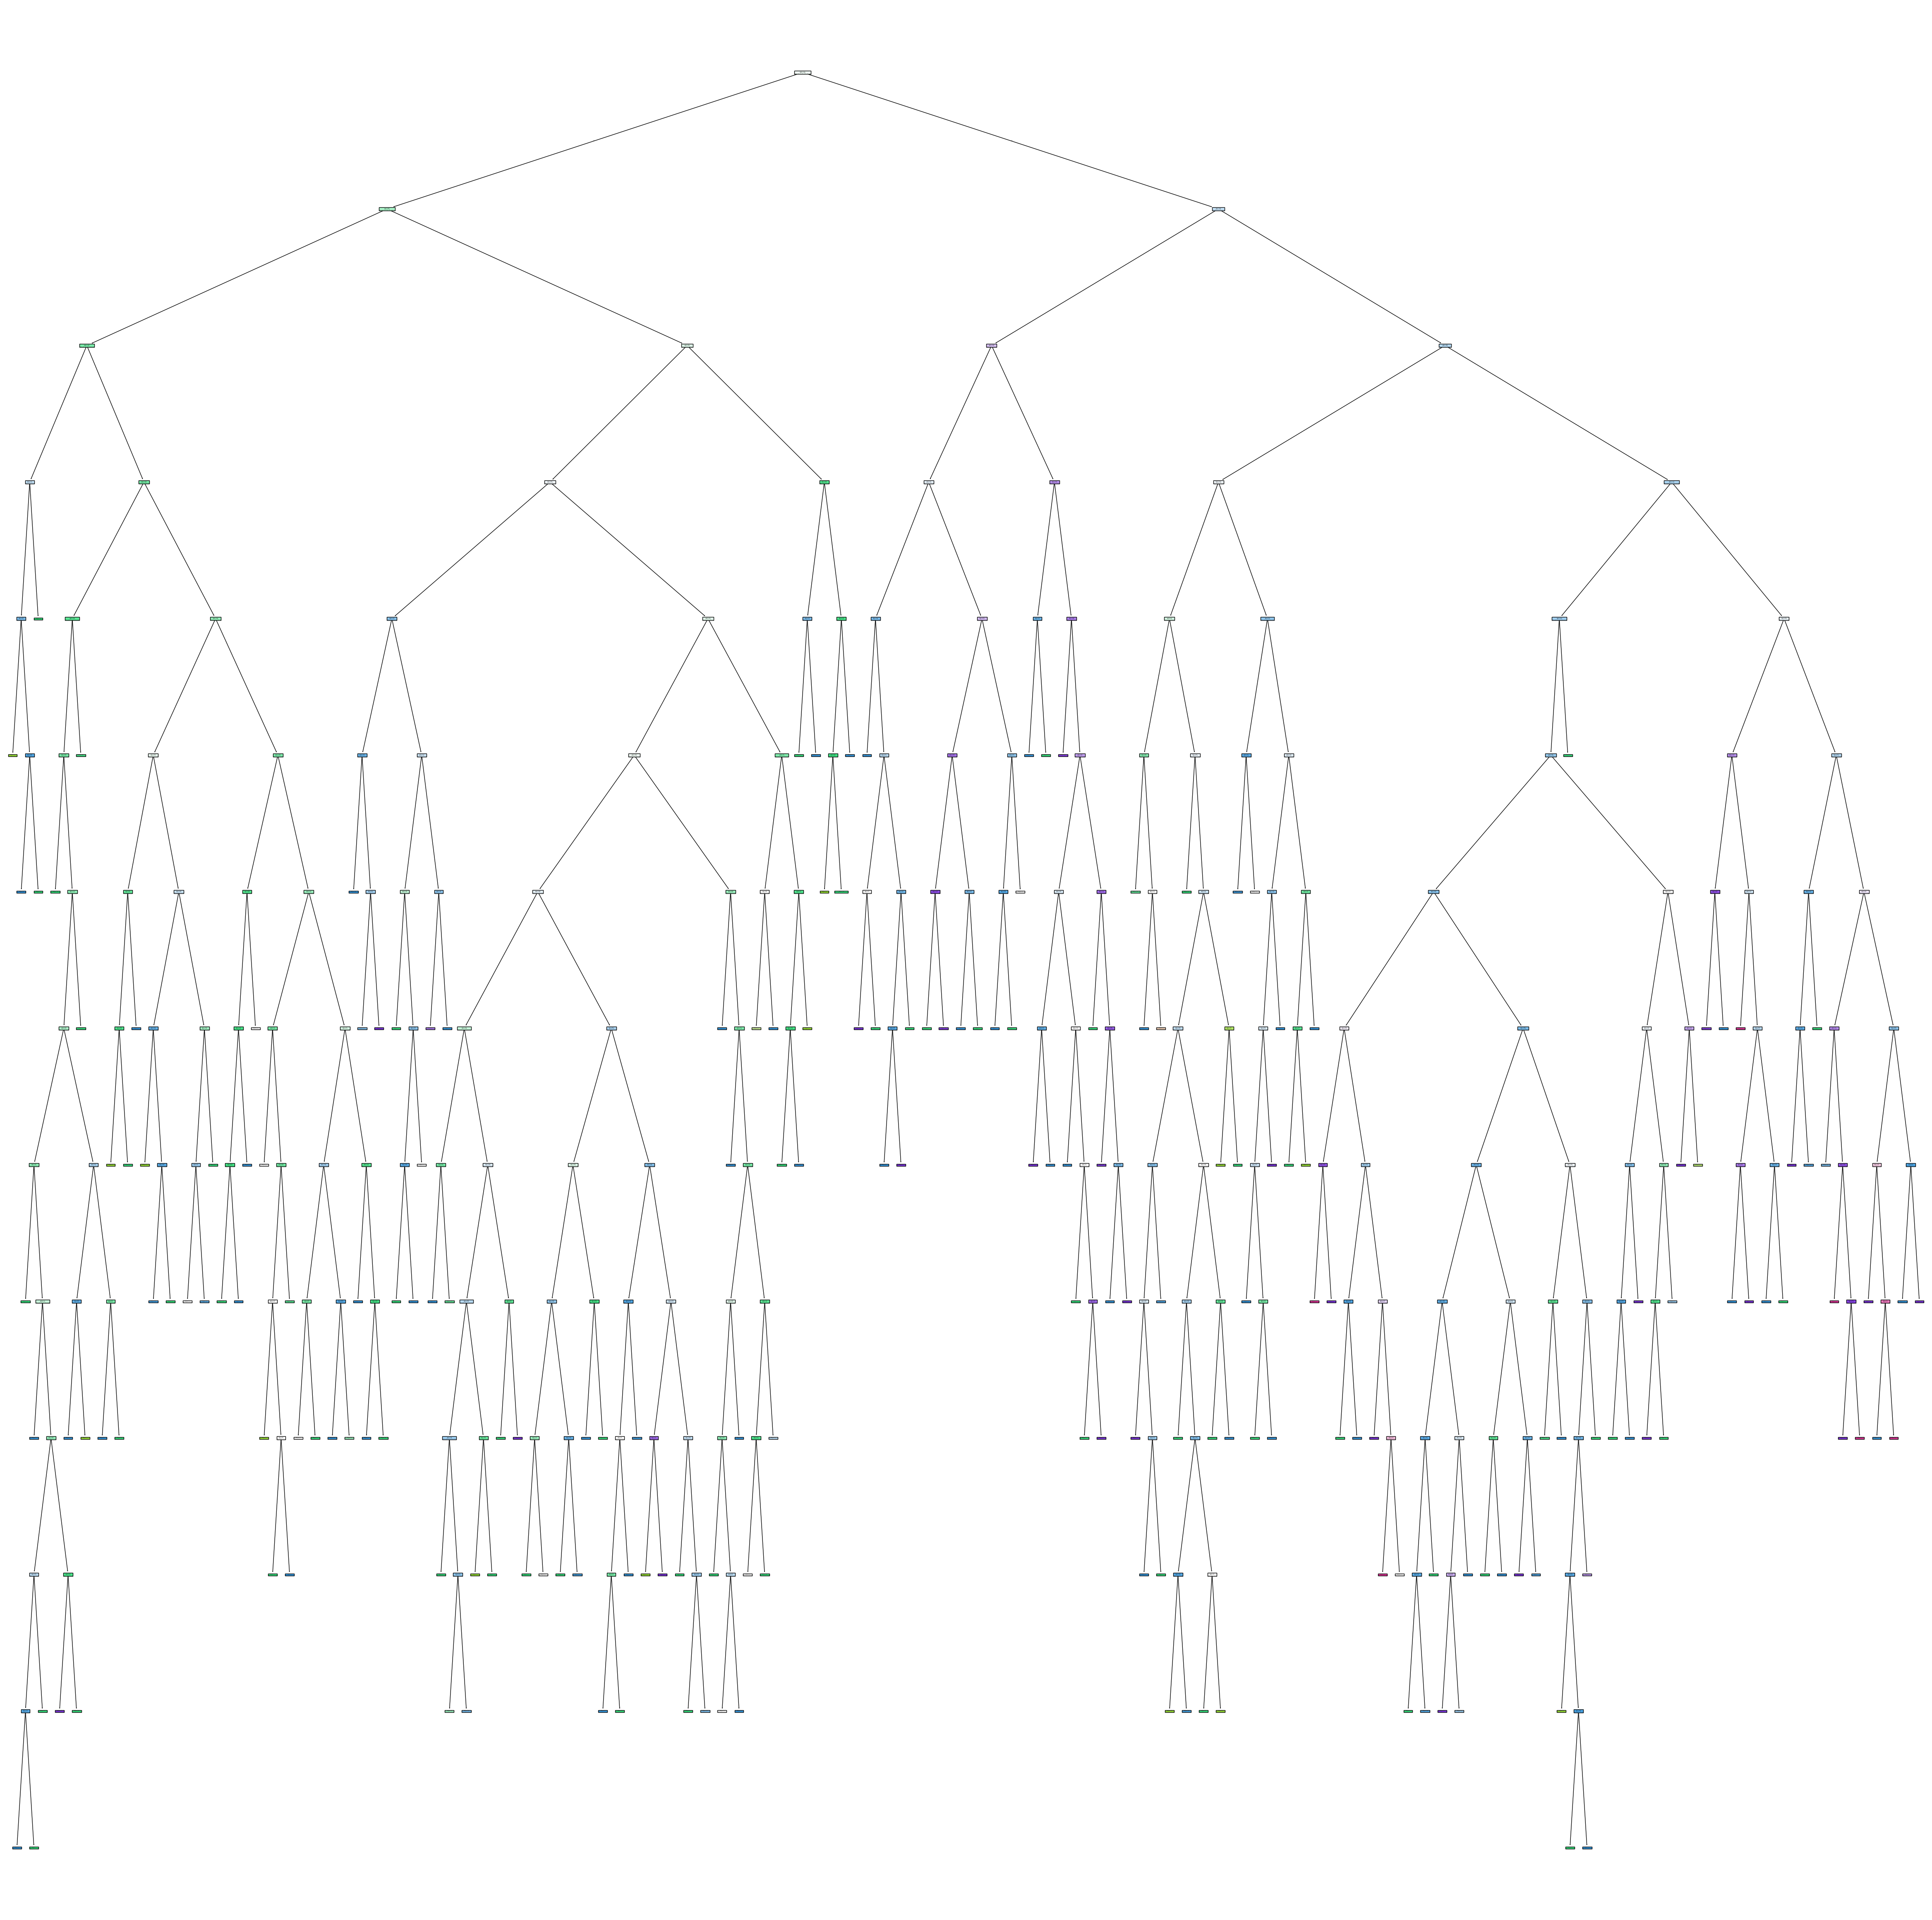

In [51]:
# 4 Repeat exercise 3 with a DecisionTreeClassifier that you call “Tree B” and where the maximum number of leaf nodes is 200. Compare the complexity of this tree to Tree A, what do you see?
# Use random_state=0
from sklearn.tree import DecisionTreeClassifier
Tree_B = DecisionTreeClassifier(max_leaf_nodes= 200)
grown_tree_b = Tree_B.fit(X_train_w, y_train_w)
pred_b = grown_tree_b.predict(X_test_w)
plt.figure(figsize=(60,60))
plot_tree(Tree_B, filled=True)

#plt.figure(figsize=(60,60))


[Text(0.296875, 0.9285714285714286, 'x[10] <= 10.35\ngini = 0.648\nsamples = 1279\nvalue = [8.0, 42.0, 546.0, 496.0, 172.0, 15.0]'),
 Text(0.125, 0.7857142857142857, 'x[9] <= 0.585\ngini = 0.527\nsamples = 703\nvalue = [5.0, 23.0, 428.0, 222.0, 24.0, 1.0]'),
 Text(0.2109375, 0.8571428571428572, 'True  '),
 Text(0.0625, 0.6428571428571429, 'gini = 0.42\nsamples = 331\nvalue = [3.0, 15.0, 242.0, 69.0, 2.0, 0.0]'),
 Text(0.1875, 0.6428571428571429, 'x[6] <= 86.5\ngini = 0.577\nsamples = 372\nvalue = [2, 8, 186, 153, 22, 1]'),
 Text(0.125, 0.5, 'x[1] <= 0.365\ngini = 0.59\nsamples = 316\nvalue = [2, 7, 137, 147, 22, 1]'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.511\nsamples = 59\nvalue = [0, 0, 10, 39, 9, 1]'),
 Text(0.1875, 0.35714285714285715, 'gini = 0.576\nsamples = 257\nvalue = [2, 7, 127, 108, 13, 0]'),
 Text(0.25, 0.5, 'gini = 0.223\nsamples = 56\nvalue = [0, 1, 49, 6, 0, 0]'),
 Text(0.46875, 0.7857142857142857, 'x[1] <= 0.345\ngini = 0.664\nsamples = 576\nvalue = [3, 19, 118, 

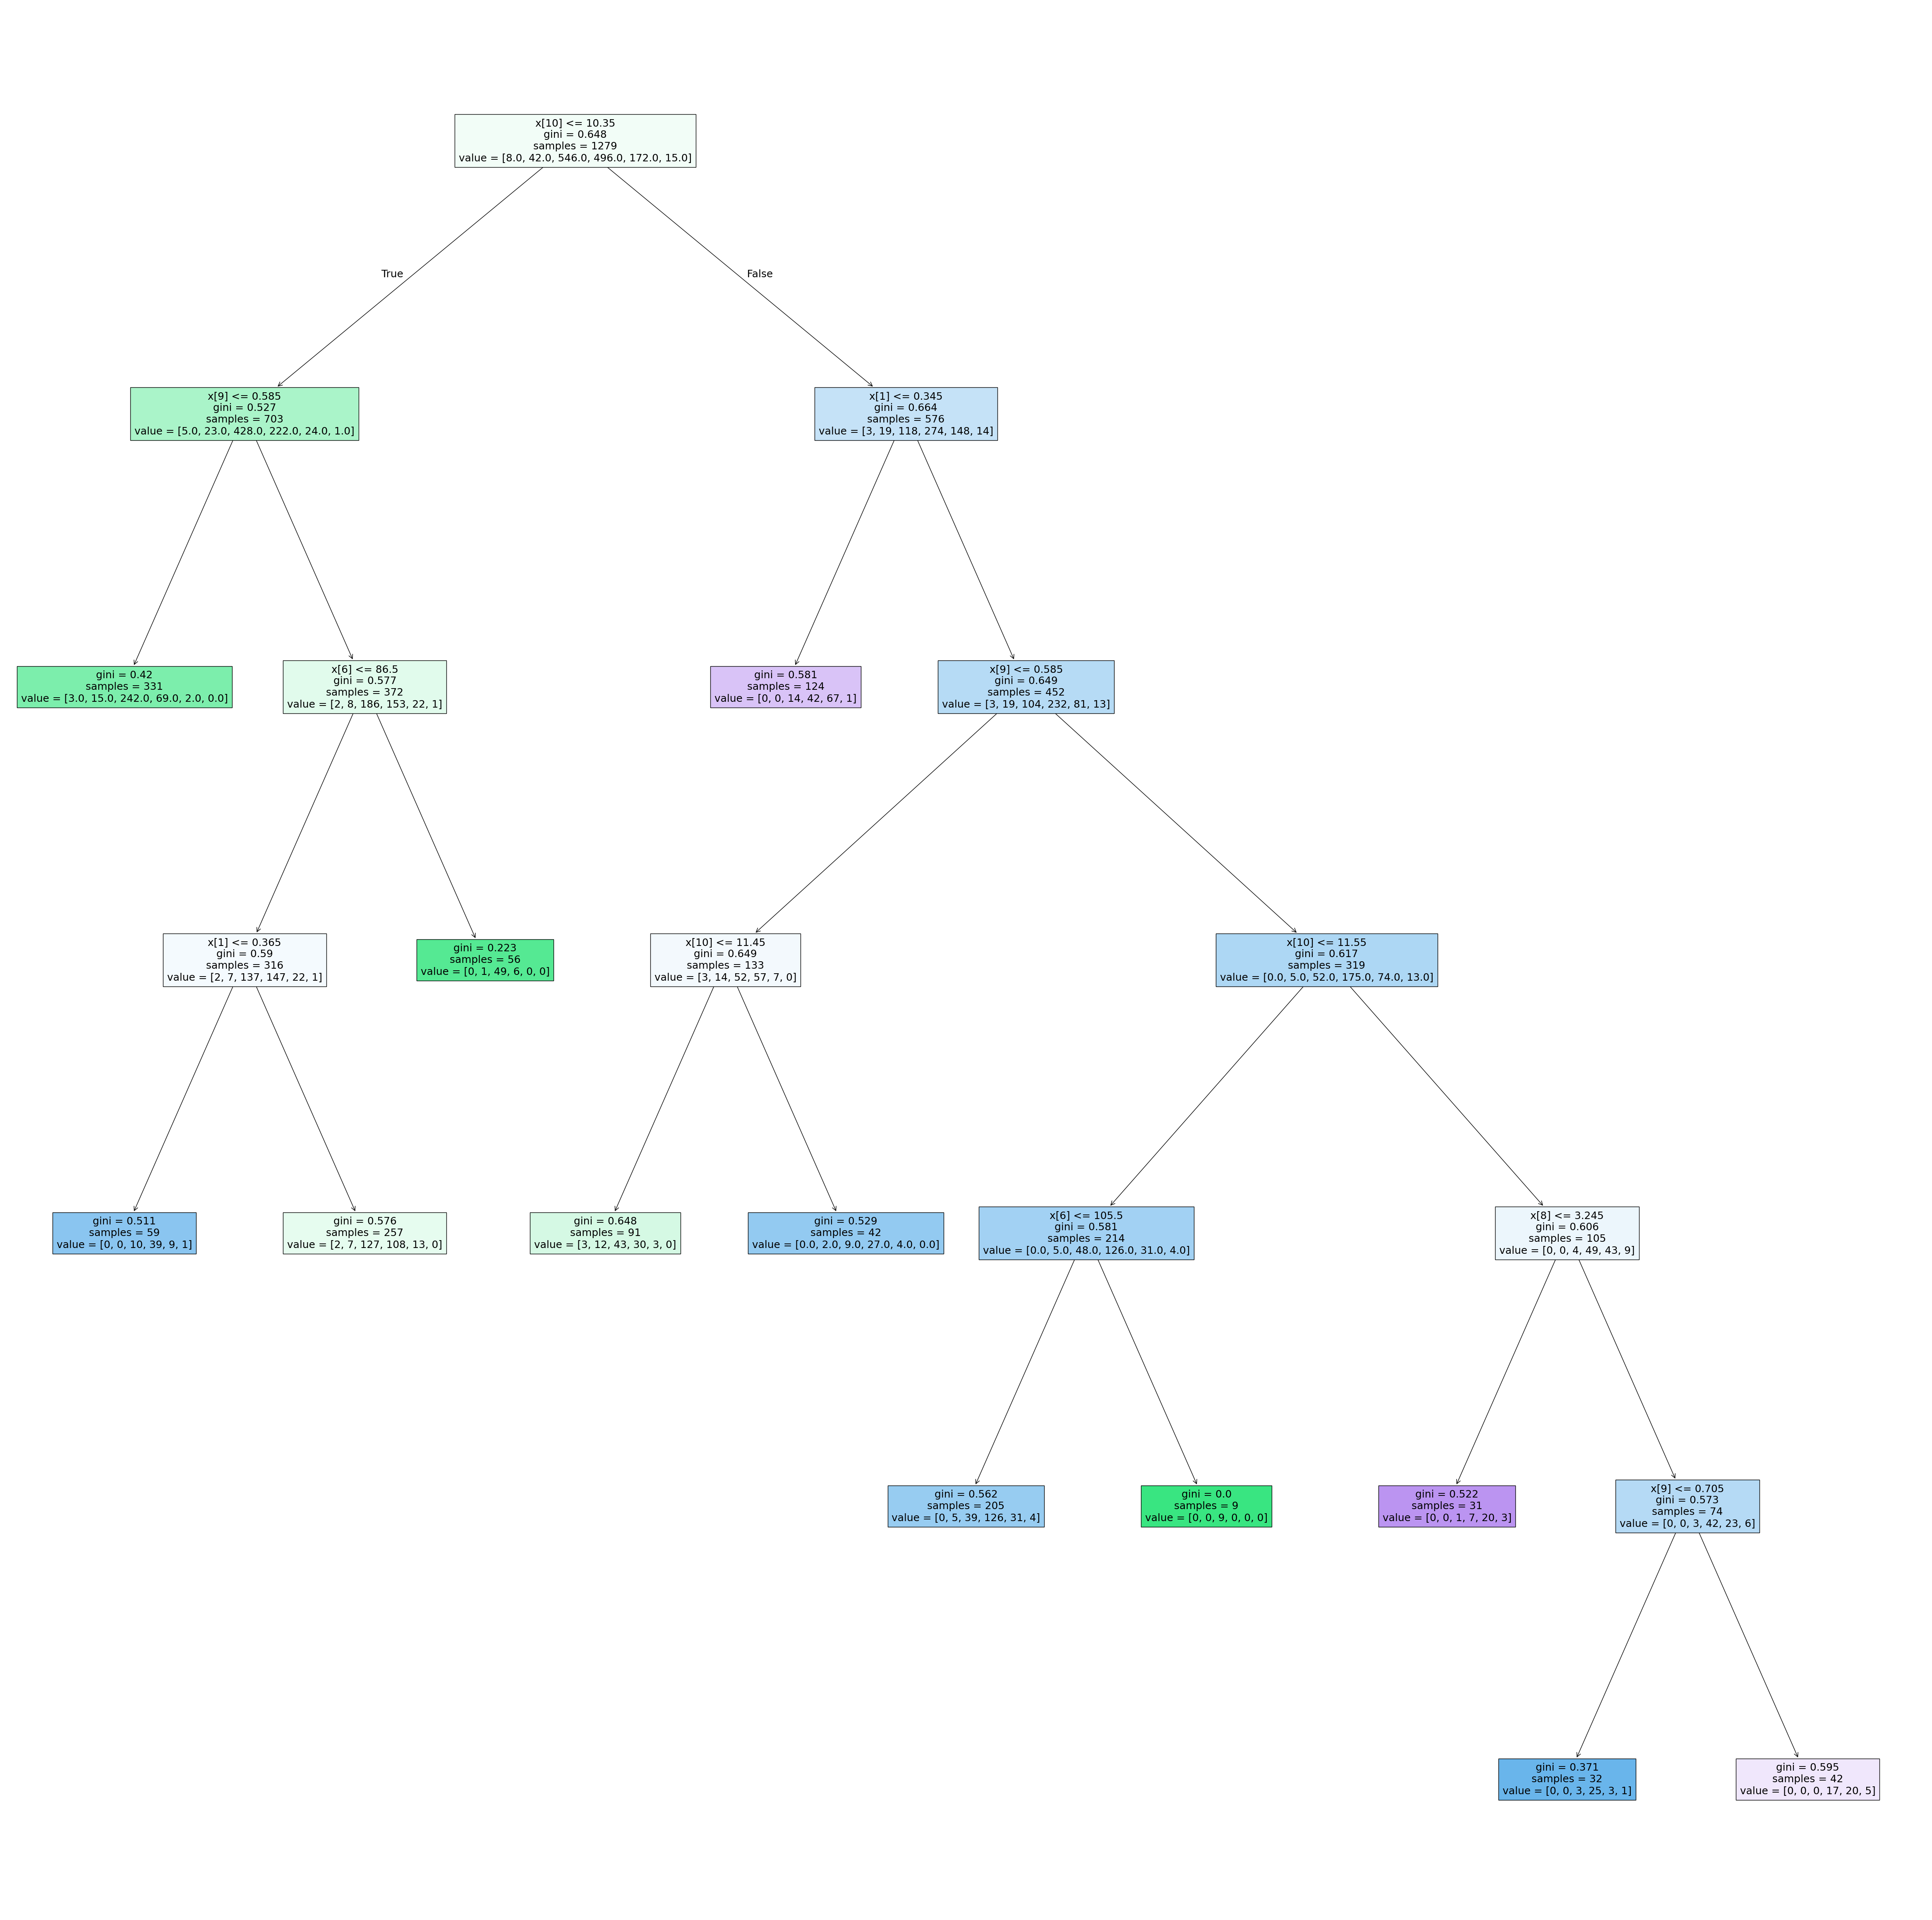

In [56]:
# 5
# Use random_state=0

from sklearn.tree import DecisionTreeClassifier
Tree_C = DecisionTreeClassifier(max_leaf_nodes= 12)
grown_tree_c = Tree_C.fit(X_train_w, y_train_w)
pred_c = grown_tree_c.predict(X_test_w)
plt.figure(figsize=(60,60))
plot_tree(Tree_C, filled=True)

In [57]:
# 6 Use the accuracy score to compare the generalization performance of the tree decision trees. Is this what you expect?
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_w, pred_A))
print(accuracy_score(y_test_w, pred_b))
print(accuracy_score(y_test_w, pred_c))

0.678125
0.640625
0.565625


## Exercise 22: Grid Search and Cross Validation

We will need to compare a larger part of the hyperparameter configuration space. An efficient way of doing so is by performing a cross-validation grid search.

Use the created grid search below ("Grid_Wine") to find the optimal hyperparameter configuration of the decision tree classifier on the wine quality dataset. To do so, you still need to:
1. Apply the fit method on the "Grid_Wine" gridsearch function and feed the X_train_w and y_train_w to it. Then run this cell.
2. Apply the "best_estimator_" method to the "Grid_wine" gridsearch. What do you get back? Is this surprising? Save the result as the variable "best_wine".
3. Use the "best_wine" decision tree to predict the test labels. Use the accuracy_score to evaluate its performance.

In [58]:
#1
from sklearn.model_selection import GridSearchCV

criterion_w = ['gini']
max_depth_w = [5,10,13,12,15,20]
max_leaf_nodes_w=[100,200,50,286,290,295,300,320,310]


parameters = dict(criterion=criterion_w,
                      max_depth=max_depth_w, max_leaf_nodes=max_leaf_nodes_w)

Grid_Wine=GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, verbose=2, cv=14, scoring= "accuracy")
Grid_Wine.fit(X_train_w, y_train_w)
#Apply the fit method on the "Grid_Wine" gridsearch function and feed the X_train_w and y_train_w to it. Then run this cel.


Fitting 14 folds for each of 54 candidates, totalling 756 fits
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=100; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=14.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, max_leaf_nodes=200; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=50; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=50; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=50; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=50; total time=   0.0s
[CV] END .....criterion=gini

GridSearchCV(cv=14, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 10, 13, 12, 15, 20],
                         'max_leaf_nodes': [100, 200, 50, 286, 290, 295, 300,
                                            320, 310]},
             scoring='accuracy', verbose=2)

In [60]:
#2
best_wine = Grid_Wine.best_estimator_
print(best_wine)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=290, random_state=0)


In [64]:
#3
pred_best = best_wine.predict(X_test_w)
print(accuracy_score(pred_best, y_test_w))

0.684375
